### Table of Sections
1. [Import all the required libraries](#Import-all-the-required-libraries)
2. [Read Irish Housing datasets](#Read-Irish-Housing-datasets)
3. [Statistical Analysis of Loan Approval Dataset](#Statistical-Analysis-of-Loan-Approval-Dataset)
    1. [Binomial Distribution](#Binomial-Distribution)
    2. [Normal Distribution](#Normal-approximation-to-the-Binomial-distribution)
4. [Data Exploration (External Notebook)](data-exploration-notebook.ipynb)
5. [Data Preparation](#Preparing-Additional-Datasets)
    1. [Housing Prices](#1.-Housing-Prices)
    2. [Annual Market Information Indices](#2.-Annual-Market-Information-Indices)
    3. [House Registrations](#3.-House-Registrations)
    4. [Planning Permissions](#4.-Planning-Permissions)
    5. [Unemployment Rates](#5.-Unemployment-Rates)
    6. [National Economic Statistics](#6.-National-Economic-Statistics)
6. [Combining the datasets together](#Combining-the-datasets-together)
7. [Machine Learning Analysis](#Machine-Learning-Analysis)
    1. [Defining Functions for Iterative Experimenting](#Defining-functions-to-help-with-iterative-experiments)
    2. [Regression Models](#Regression-Models)
    3. [Regression with Scaling and Cross Validation](#Regressions-with-Scaling-and-Cross-Validation)
    4. [Deciding on the best performing Model and Parameters](#Deciding-on-the-best-performing-Model-and-parameters)

### Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, zscore, boxcox
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Listing all versions of packages
!pip show conda pandas numpy seaborn matplotlib scipy sklearn | grep -e Name -e Version

Name: conda
Version: 4.10.3
Name: pandas
Version: 1.5.3
Name: numpy
Version: 1.22.4
Name: seaborn
Version: 0.12.2
Name: matplotlib
Version: 3.4.3
Name: scipy
Version: 1.7.1


### Read Irish Housing datasets
[Top](#Table-of-Sections)

In [3]:
# Source: https://data.gov.ie/dataset/hsq06-average-price-of-houses/resource/eec93d2b-a0bf-4b59-bbbb-3839c95ac7e1
housing_prices_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HSQ06/CSV/1.0/en")

# Source: https://data.gov.ie/dataset/overall-loan-approvals-by-year?package_type=dataset
loan_approvals_df = pd.read_csv("https://opendata.housing.gov.ie/dataset/f8f865c4-008f-4ef5-9902-09ad73d2acb0/resource/23c06cd8-8d58-4b2f-82b3-95f014f35b57/download/overall_loan_approvals_by_year.csv", header=[0,1], skiprows=1, encoding='cp1252')

# Source: https://data.gov.ie/dataset/supply-of-housing-land-2000-to-2012?package_type=dataset
supply_housing_df = pd.read_csv("https://opendata.housing.gov.ie/dataset/d709918c-bd2d-4b39-aeff-0ab3f5f6603e/resource/9166d0e4-51b1-406d-a496-0f9fb8586230/download/supply_of_housing_land_2000_to_2012.csv", header=[0,1], skiprows=1)

# Source: https://data.gov.ie/dataset/planning-decisions-by-type-of-application-1995-2012?package_type=dataset
planning_decisions_df = pd.read_csv("https://opendata.housing.gov.ie/dataset/cad82a64-6524-4918-8413-d18f9c96b5dc/resource/8db933b5-4b1a-4d19-b00d-e30dde9b0e33/download/planning_decisions_by_type_of_application_1995-2012.csv", skiprows=1, header=[0])

# Source: https://data.gov.ie/dataset/national-house-construction-cost-index?package_type=dataset
national_house_cost_index_df = pd.read_csv("https://opendata.housing.gov.ie/dataset/aefa3fae-0ca1-4694-867a-a8a70ea77397/resource/188485c4-e5d7-4406-996b-1ff12a9a045a/download/national_house_construction_cost_index_0.csv", skiprows=1, header=[1])

# Source: https://data.gov.ie/dataset/annual-market-information-indices?package_type=dataset
annual_market_information_indices = pd.read_csv('https://opendata.housing.gov.ie/dataset/15c05066-0d0c-4cd0-9d6c-480c356b5fe6/resource/31248a26-f2e5-4c3d-ad42-2bdcac293bb2/download/market_information_indices_annual_0.csv', skiprows=3, header=[0])

# Source: https://data.gov.ie/dataset/house-registrations-by-area?package_type=dataset
house_registration_df = pd.read_csv("https://opendata.housing.gov.ie/dataset/8d049ce8-254f-4636-b97a-37afd79bb4c4/resource/1d898b5e-7974-444f-b43c-5eb5162718ae/download/house_registrations_by_area.csv", header=[0,1], skiprows=1)

# Source: https://data.gov.ie/dataset/lrm03-seasonally-adjusted-standardised-unemployment-rate-/resource/2d63d7f4-7e3e-42ab-856f-f0817f69fb17
unemployment_rates = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/LRM03/CSV/1.0/en', header=[0])

# Source: https://data.gov.ie/dataset/nqq48-gross-domestic-product-and-gross-national-product?package_type=dataset
gdp_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NQQ48/CSV/1.0/en", header=[0])

# Source: https://data.gov.ie/dataset/fim09-financial-interest-rates-historical-series?package_type=dataset
fin_interest_rates = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FIM09/CSV/1.0/en', header=[0])

# Source: https://data.gov.ie/dataset/cbm02-retail-interest-rates-households/resource/ebbf533d-c446-4320-9945-87c8d7900f6c
retail_interest_rates = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/CBM02/CSV/1.0/en', header=[0])

### Statistical Analysis of Loan Approval Dataset
[Top](#Table-of-Sections)

In [4]:
loan_approvals_df.shape

(47, 7)

In [5]:
# Show first and last rows
loan_approvals_df.iloc[[0,-1]]

,Year,New Houses,Unnamed: 2_level_0,Other Houses,Unnamed: 4_level_0,Totals,Unnamed: 6_level_0
,Unnamed: 0_level_1,Number,Value €m,Number,Value €m,Number,Value €m
0,1970.0,"7,884",33.5,"4,587",19.9,"12,471",53.5
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan_approvals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   (Year, Unnamed: 0_level_1)       46 non-null     float64
 1   (New Houses, Number)             46 non-null     object 
 2   (Unnamed: 2_level_0, Value  €m)  46 non-null     object 
 3   (Other Houses, Number)           46 non-null     object 
 4   (Unnamed: 4_level_0, Value  €m)  46 non-null     object 
 5   (Totals, Number)                 46 non-null     object 
 6   (Unnamed: 6_level_0, Value  €m)  46 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.7+ KB


In [7]:
loan_approvals_df.isnull().sum()

Year                Unnamed: 0_level_1    1
New Houses          Number                1
Unnamed: 2_level_0  Value  €m             1
Other Houses        Number                1
Unnamed: 4_level_0  Value  €m             1
Totals              Number                1
Unnamed: 6_level_0  Value  €m             1
dtype: int64

In [8]:
loan_approvals_df.duplicated().sum()

0

In [9]:
# Rename the columns to more useful format
loan_approvals_df.columns = ["year", "new_houses_loans", "new_houses_loans_value", "other_houses_loans", "other_houses_loans_value", "total_loans", "total_loans_value"]
# Last row is fully empty, so dropping it
loan_approvals_df = loan_approvals_df[:-1]

In [10]:
# Select only the year and new_houses_number columns
loan_approvals_df = loan_approvals_df[['year', 'new_houses_loans', 'other_houses_loans', 'total_loans']].copy()
loan_approvals_df['year'] = loan_approvals_df['year'].astype('int').astype('str')
# Get number out of string with comma in thousand position
loan_approvals_df['new_houses_loans'] = loan_approvals_df['new_houses_loans'].astype('str').str.replace(',', '').astype('int')
loan_approvals_df['other_houses_loans'] = loan_approvals_df['other_houses_loans'].astype('str').str.replace(',', '').astype('int')
loan_approvals_df['total_loans'] = loan_approvals_df['total_loans'].astype('str').str.replace(',', '').astype('int')

# loan_approvals_df.head()
loan_approvals_df.iloc[[0,-1]]

,year,new_houses_loans,other_houses_loans,total_loans
0,1970,7884,4587,12471
45,2015,4685,27551,32236


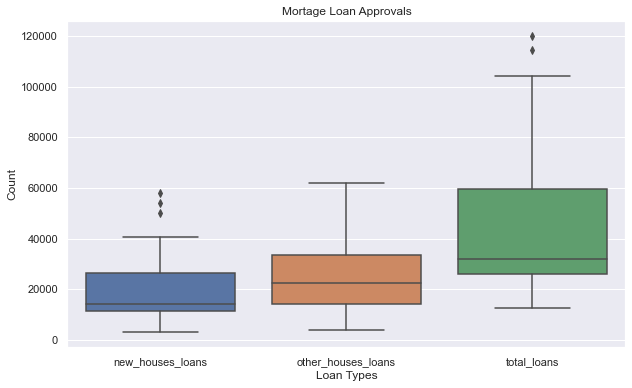

In [11]:
# figure size in inches
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(loan_approvals_df).set(xlabel='Loan Types', ylabel='Count', title='Mortage Loan Approvals');

In [12]:
# Percentage of loan approvals for new houses in total loan approvals
loan_approvals_df['new_house_loans_percent'] = loan_approvals_df['new_houses_loans'] / loan_approvals_df['total_loans'] * 100
loan_approvals_df.describe()

,new_houses_loans,other_houses_loans,total_loans,new_house_loans_percent
count,46.000000,46.000000,46.000000,46.000000
mean,19087.086957,25822.304348,44909.391304,42.873103
std,13508.370152,16184.699629,28559.618992,14.703782
min,2960.000000,4008.000000,12471.000000,13.985641
25%,11595.750000,14025.250000,26096.000000,34.385565
50%,14393.500000,22627.500000,31885.500000,42.393125
75%,26521.750000,33746.500000,59724.250000,49.167574
max,58104.000000,61933.000000,120037.000000,79.791257


In [13]:
# Check the skewness and display the skewed observations if skewness is above 1 or lower than -1
skewness = loan_approvals_df['new_houses_loans'].skew()
if skewness > 1: print(f'Positively skewed with skewness: {skewness}')
if skewness < -1: print(f'Negatively skewed with skewness: {skewness}')

Positively skewed with skewness: 1.3188068644725035


In [14]:
# Calculate zscore to identify outliers
zscores = zscore(loan_approvals_df['new_houses_loans'])
loan_approvals_df[(zscores > 2) | (zscores < -2)]

,year,new_houses_loans,other_houses_loans,total_loans,new_house_loans_percent
34,2004,50018,54287,104305,47.953598
35,2005,58104,61933,120037,48.405075
36,2006,53895,60698,114593,47.031669


In [15]:
# Caculate IQR of column 'new_houses_loans' for outliers
q1 = loan_approvals_df['new_houses_loans'].quantile(0.25)
q3 = loan_approvals_df['new_houses_loans'].quantile(0.75)
iqr = q3 - q1
# Show outliers
loan_approvals_df[(loan_approvals_df['new_houses_loans'] < q1 - 1.5*iqr) | (loan_approvals_df['new_houses_loans'] > q3 + 1.5*iqr)]

,year,new_houses_loans,other_houses_loans,total_loans,new_house_loans_percent
34,2004,50018,54287,104305,47.953598
35,2005,58104,61933,120037,48.405075
36,2006,53895,60698,114593,47.031669


In [16]:
# Apply the Box-Cox transformation to make the data more symmetrical
# loan_approvals_df['new_houses_loans'], lambda_val = boxcox(loan_approvals_df['new_houses_loans'])
# print('Lambda value:', lambda_val)
# loan_approvals_df['total_loans'], lambda_val = boxcox(loan_approvals_df['total_loans'])
# loan_approvals_df.head()

When using Box-Cox transformation, the columns were transformed in different ways. However, there is relationship between the 'new_houses_loans' and 'total_loans', since 'total_loans' is simply the combination of 'new_houses_loans' and 'other_houses_loans'. Therefore, doing this transformation affects this relationship.

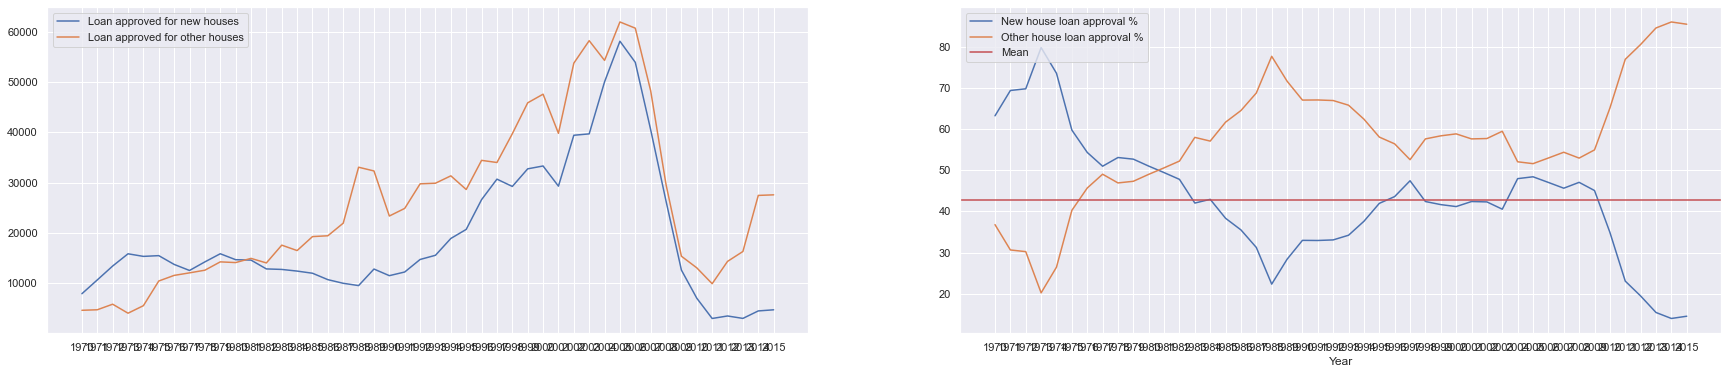

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(30,6))
ax1.plot(loan_approvals_df['year'], loan_approvals_df['new_houses_loans'], label='Loan approved for new houses')
ax1.plot(loan_approvals_df['year'], loan_approvals_df['other_houses_loans'], label='Loan approved for other houses')
ax1.legend()
ax2.plot(loan_approvals_df['new_house_loans_percent'], label='New house loan approval %')
ax2.plot(100 - loan_approvals_df['new_house_loans_percent'], label='Other house loan approval %')
ax2.axhline(y=loan_approvals_df['new_house_loans_percent'].mean(), color='r', linestyle='-', label='Mean')
ax2.legend()
plt.xlabel('Year')
# loan_approvals_df.boxplot(column='new_house_loans_percent', ax=ax3, xlabel='New House Loan Approval %')
plt.show()

#### Binomial Distribution
[Top](#Table-of-Sections)

In [18]:
avg_new_house_loans_percent = loan_approvals_df['new_house_loans_percent'].mean()
print('Average new house loan approval percent: ', avg_new_house_loans_percent)
# Also taking the average from total for validation
print(loan_approvals_df['new_houses_loans'].sum() / loan_approvals_df['total_loans'].sum() * 100)

Average new house loan approval percent:  42.87310265291531
42.501326342122695


In [19]:
p = avg_new_house_loans_percent / 100

# Sample of 10 and 20 loans
n1 = 10
n2 = 20

# Define the list of r values 
r_values1 = list(range(n1 + 1))
r_values2 = list(range(n2 + 1))

# list of pmf values for price
binom_dist1 = [round(binom.pmf(r, n1, p), 4) for r in r_values1 ]
binom_dist2 = [round(binom.pmf(r, n2, p), 4) for r in r_values2 ]
# print("r\t p(r)")
# for i in range(n + 1):
#     print(str(r_values[i]), '\t', str(dist1[i]))
    
mean1, var1 = binom.stats(n1, p)
mean2, var2 = binom.stats(n2, p)
print(f'\nMean: {mean1}, Variance: {var1}')
print(f'\nMean: {mean2}, Variance: {var2}')


Mean: 4.287310265291531, Variance: 2.449207334204117

Mean: 8.574620530583061, Variance: 4.898414668408234


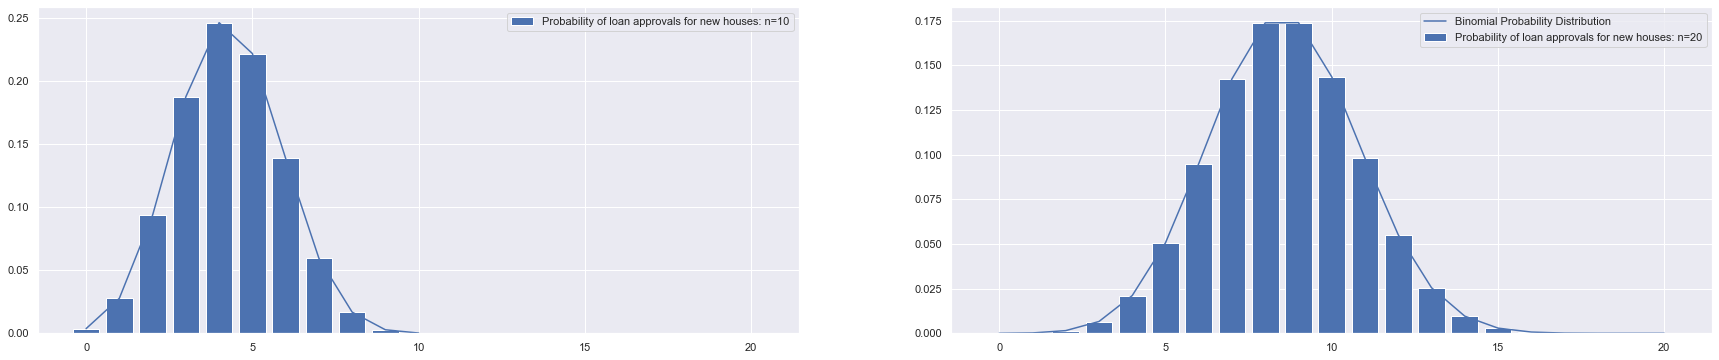

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(30,6))
ax1.bar(r_values1, binom_dist1, label=f'Probability of loan approvals for new houses: n={n1}')
ax1.plot(r_values1, binom_dist1)
# ax1.axhline(y=binom.cdf(k=2, n=n1, p=p), color='r', linestyle='-', label='Probability of less than 2')
ax1.legend()
ax2.bar(r_values2, binom_dist2, label=f'Probability of loan approvals for new houses: n={n2}')
ax2.plot(r_values2, binom_dist2, label='Binomial Probability Distribution')
ax2.legend()
plt.show()

In [21]:
# Display probabilities of exact number of successes or loan approvals for new houses when n=20
print('Probability of exact 5 loan approvals for new houses: ', binom.pmf(r_values2[5], n2, p))
print('Probability of exact 10 loan approvals for new houses: ', binom.pmf(r_values2[10], n2, p))

Probability of exact 5 loan approvals for new houses:  0.05057989119846802
Probability of exact 10 loan approvals for new houses:  0.14350071462048797


#### Normal approximation to the Binomial distribution
[Top](#Table-of-Sections) <br>
**Applying correction to continuity**<br>
Binomial         Normal<br>
P(x=a value)     P(value - 0.5 < x < value + 0.5)<br>
P(x>=a value)    P(x > value - 0.5)<br>
P(x>a value)     P(x > value + 0.5)<br>
P(x<=a value)    P(x < value + 0.5)<br>
P(x<a value)     P(x < value - 0.5)<br>

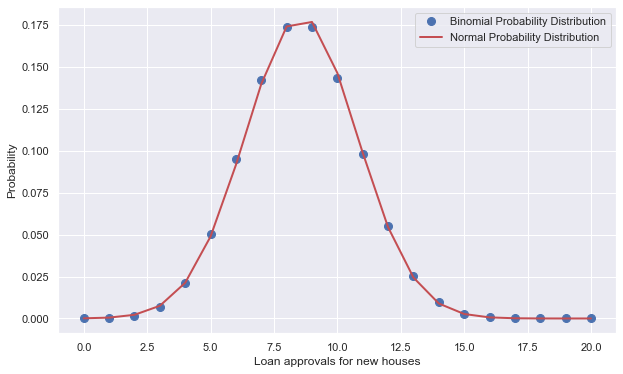

In [22]:
# Creating normal distribution for sample of 20
norm_dist = norm.pdf(r_values2, loc=mean2, scale=np.sqrt(var2))
plt.plot(r_values2, binom_dist2, 'bo', ms=8, label='Binomial Probability Distribution')
plt.plot(r_values2, norm_dist, 'r-', lw=2, label='Normal Probability Distribution')
plt.xlabel('Loan approvals for new houses')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [23]:
# The probability of less than equal to 12
print('Probability of less than equal to 12 loan approvals for new houses:')
print('Binomial: ', binom.cdf(k=12, n=n2, p=p))
print('Normal: ', norm.cdf(12.5, loc=mean2, scale=np.sqrt(var2)))

# The probability of more than 12
print('\nProbability of more than 12 loan approvals for new houses:')
print('Binomial: ', binom.sf(k=12, n=n2, p=p))
print('Normal: ', norm.sf(12.5, loc=mean2, scale=np.sqrt(var2)))

Probability of less than equal to 12 loan approvals for new houses:
Binomial:  0.9613247396908604
Normal:  0.9619347204273013

Probability of more than 12 loan approvals for new houses:
Binomial:  0.0386752603091396
Normal:  0.03806527957269866


### Preparing Additional Datasets

#### 1. Housing Prices

In [24]:
# Get unique values of 'Statistic Label' feature
print("Statistic Labels: ", housing_prices_df['Statistic Label'].unique())

# Create new DF with only 'New House Prices' and 'National'
new_house_prices_df = housing_prices_df.loc[(housing_prices_df['Statistic Label'] == 'New House Prices') & (housing_prices_df['Area'] == 'National')].copy()

# TLIST(Q1) contains year and quarter number. Adding 'year' column by dividing TLIST(Q1) by 10 and getting quotient 
new_house_prices_df['year'] = (new_house_prices_df['TLIST(Q1)'] // 10).astype('str')

# Group the rows by year and get the average price
annual_house_prices_df = new_house_prices_df.groupby('year').mean('VALUE').reset_index().drop(['TLIST(Q1)'], axis=1)
annual_house_prices_df = annual_house_prices_df.rename(columns={'VALUE': 'avg_price'})
annual_house_prices_df.iloc[[0,-1]]

Statistic Labels:  ['New House Prices' 'Second Hand House Prices']


,year,avg_price
0,1975,12971.25
41,2016,312910.00


#### 2. Annual Market Information Indices

In [25]:
# Rename columns
annual_market_information_indices.columns = ['year', 'new_house_price_index', 'mortgage_interest_rates_index', 'avg_earnings_of_adult_workers', 'hcc_index', 'cpi']
# Convert the 'year' column to 'str' dtype
annual_market_information_indices['year'] = annual_market_information_indices['year'].astype('str')
annual_market_information_indices.iloc[[0,-1]]

,year,new_house_price_index,mortgage_interest_rates_index,avg_earnings_of_adult_workers,hcc_index,cpi
0,1990,98,99,99.0,98,98
25,2015,420,27,NaN,205,169


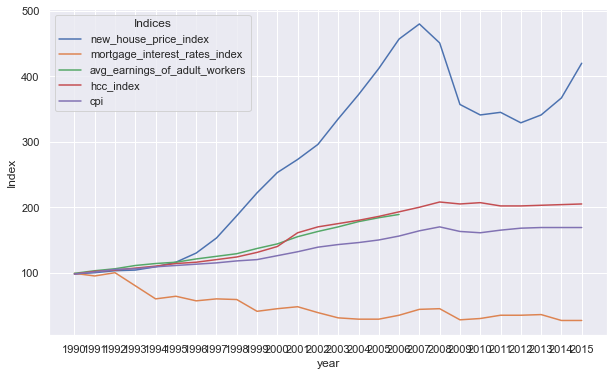

In [26]:
# Plot all the indices to show their trend over years
sns.lineplot(data=annual_market_information_indices.melt(id_vars='year', var_name='Indices', value_name='Index'), x='year', y='Index', hue='Indices');

In [27]:
# Merge the datasets
annual_market_info_prices = annual_market_information_indices.merge(annual_house_prices_df)
annual_market_info_prices.iloc[[0,-1]]

,year,new_house_price_index,mortgage_interest_rates_index,avg_earnings_of_adult_workers,hcc_index,cpi,avg_price
0,1990,98,99,99.0,98,98,65565.75
25,2015,420,27,NaN,205,169,281579.50


In [28]:
# Checking null values
annual_market_info_prices.isnull().sum()

year                             0
new_house_price_index            0
mortgage_interest_rates_index    0
avg_earnings_of_adult_workers    9
hcc_index                        0
cpi                              0
avg_price                        0
dtype: int64

In [29]:
# Feature 'avg_earnings_of_adult_workers' has NaN values in last 9 years
# It is an independent feature, so it may not be good to fill its unknown values with any other data
# Will see how much relevant this feature becomes later in the machine learning section, and will decide to drop or fill this column
annual_market_info_prices[['year','avg_earnings_of_adult_workers']].tail(9)

,year,avg_earnings_of_adult_workers
17,2007,NaN
18,2008,NaN
19,2009,NaN
20,2010,NaN
21,2011,NaN
22,2012,NaN
23,2013,NaN
24,2014,NaN
25,2015,NaN


In [30]:
# Calculate inflation adjusted price using CPI of last available year and add it as a new feature
current_cpi = annual_market_info_prices.iloc[-1, 5] # Fetch cpi value from last row
annual_market_info_prices['infation_adjusted_price'] = (annual_market_info_prices['avg_price'] * current_cpi) / annual_market_info_prices['cpi']
annual_market_info_prices.iloc[[0,-1]]

,year,new_house_price_index,mortgage_interest_rates_index,avg_earnings_of_adult_workers,hcc_index,cpi,avg_price,infation_adjusted_price
0,1990,98,99,99.0,98,98,65565.75,113067.466837
25,2015,420,27,NaN,205,169,281579.50,281579.500000


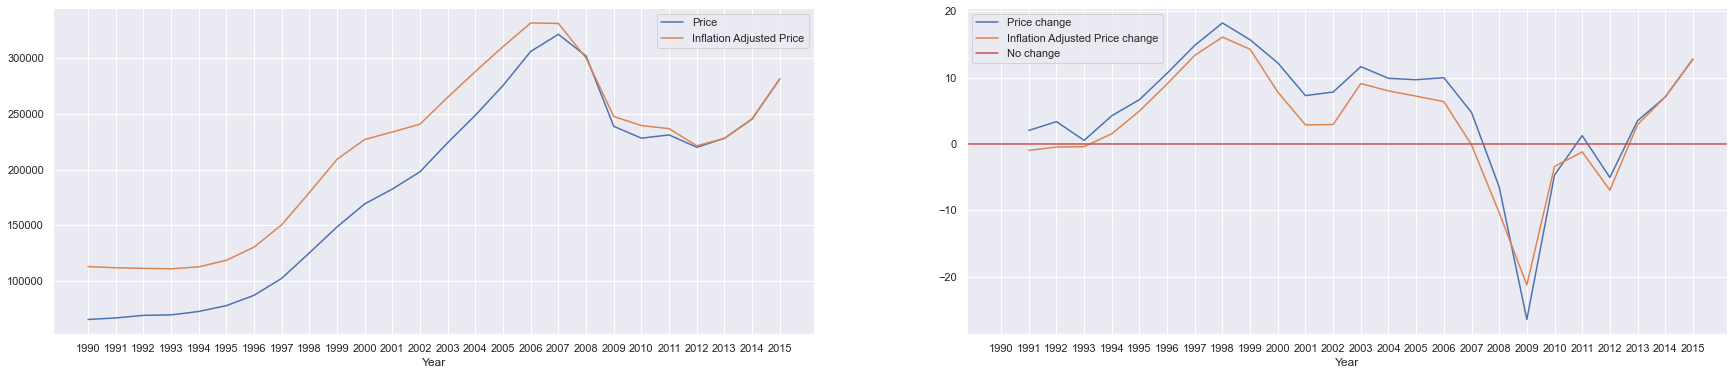

In [31]:
# Plot the year-over-year change in price and inflation adjusted price
fig, (ax2, ax1) = plt.subplots(1,2, figsize=(30, 6), sharex=True)
ax1.plot(annual_market_info_prices['year'], ((annual_market_info_prices['avg_price']-annual_market_info_prices['avg_price'].shift())/annual_market_info_prices['avg_price']*100), label='Price change')
ax1.plot(annual_market_info_prices['year'], ((annual_market_info_prices['infation_adjusted_price']-annual_market_info_prices['infation_adjusted_price'].shift())/annual_market_info_prices['infation_adjusted_price']*100), label='Inflation Adjusted Price change')
ax1.set_xlabel('Year')
ax1.axhline(0, color='r', linestyle='-', label='No change')
ax1.legend()

ax2.plot(annual_market_info_prices['year'], annual_market_info_prices['avg_price'], label='Price')
ax2.plot(annual_market_info_prices['year'], annual_market_info_prices['infation_adjusted_price'], label='Inflation Adjusted Price')
ax2.legend()
ax2.set_xlabel('Year')
plt.show()

#### 3. House Registrations
[Top](#Table-of-Sections)

In [32]:
# Get the columns containing county and total values
year_totals = [(col[0], col[1]) for col in house_registration_df.columns if 'TOTAL' in col[1] or 'County' in col[1]]
# Select only the features/columns that contain sub-index "TOTAL"
total_house_registration_df = house_registration_df.loc[:, year_totals]
total_house_registration_df.iloc[[0,-1]]

,Year:,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,Unnamed: 49_level_0,Unnamed: 62_level_0,Unnamed: 75_level_0,Unnamed: 88_level_0,Unnamed: 101_level_0,Unnamed: 114_level_0,Unnamed: 127_level_0,Unnamed: 140_level_0,Unnamed: 153_level_0,Unnamed: 166_level_0
,County,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,...,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL
0,Carlow,1,5,44,97,61,99,64,69,41,...,936,747,230,60,37,17.0,1.0,2,26,6
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Drop last line as it is fully empty
total_house_registration_df.drop(total_house_registration_df.tail(1).index, inplace=True)
total_house_registration_df.iloc[[0,-1]]

,Year:,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,Unnamed: 49_level_0,Unnamed: 62_level_0,Unnamed: 75_level_0,Unnamed: 88_level_0,Unnamed: 101_level_0,Unnamed: 114_level_0,Unnamed: 127_level_0,Unnamed: 140_level_0,Unnamed: 153_level_0,Unnamed: 166_level_0
,County,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,\n TOTAL,...,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL,TOTAL
0,Carlow,1,5,44,97,61,99,64,69,41,...,936,747,230,60,37,17.0,1.0,2,26,6
26,TOTALS,"3,781","5,565","9,609","10,785","9,448","10,830","10,422","8,819","8,249",...,"66,649","38,351","12,676","3,743","1,680",834.0,627.0,"1,326","2,574","4,297"


In [34]:
# The columns contain years from 1978 to 2015
# Creating new columns with these years to make it easier to access and use
new_cols = list(np.arange(1978, 2016).astype('str'))
# Insert 'county' column at the first index
new_cols.insert(0, 'county')
total_house_registration_df.columns = new_cols
total_house_registration_df.iloc[[0,-1]]

,county,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Carlow,1,5,44,97,61,99,64,69,41,...,936,747,230,60,37,17.0,1.0,2,26,6
26,TOTALS,"3,781","5,565","9,609","10,785","9,448","10,830","10,422","8,819","8,249",...,"66,649","38,351","12,676","3,743","1,680",834.0,627.0,"1,326","2,574","4,297"


In [35]:
# Transpose the DF to make the "years" as rows/observations, and counties as columns/features
# Reset the index, and then rename the index column to "year" and "TOTALS" to "national"
total_house_registration_df = total_house_registration_df.set_index('county').transpose().reset_index().rename(columns={'index': 'year', 'TOTALS': 'national'})
total_house_registration_df.iloc[[0,-1]]

county,year,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,...,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow,national
0,1978,1,10,65,367,27,"1,761",173,32,154,...,0,6,20,3,29,189,177,43,228,"3,781"
37,2015,6,0,25,479,15,"2,535",59,19,448,...,10,4,8,0,13,42,18,77,182,"4,297"


In [36]:
# Convert the value to 'int' dtype after converting to 'str' and then to 'float'
total_house_registration_df['national'] = total_house_registration_df['national'].astype('str').str.replace(',', '').astype('float').astype('int')

In [37]:
national_house_registration_df = total_house_registration_df[['year', 'national']].rename(columns={'national': 'house_registrations'})
national_house_registration_df.iloc[[0,-1]]

county,year,house_registrations
0,1978,3781
37,2015,4297


#### 4. Planning Permissions
[Top](#Table-of-Sections)

In [38]:
planning_decisions_df.iloc[[0,-1]]

,Year,Outline Permission,%,Approval**,%.1,Permission,%.2,Total Decisions
0,1995,"3,539",8.6,942,2.3,"36,801",89.1,"41,282"
17,2012,224,1.1,NaN,NaN,"19,985",98.9,"20,209"


In [39]:
# Select only subset of columns and copy the DF
planning_decisions_df = planning_decisions_df[['Year', 'Permission', '%.2', 'Total Decisions']].copy()
# Convert the values containing ',' to numeric
planning_decisions_df['Year'] = planning_decisions_df['Year'].astype('str')
planning_decisions_df['Permission'] = pd.to_numeric(planning_decisions_df['Permission'].astype('str').str.replace(',', ''))
planning_decisions_df['Total Decisions'] = pd.to_numeric(planning_decisions_df['Total Decisions'].astype('str').str.replace(',', ''))
planning_decisions_df.columns = ['year', 'permissions', 'permission_percent', 'total_decisions']
planning_decisions_df.iloc[[0,-1]]

,year,permissions,permission_percent,total_decisions
0,1995,36801,89.1,41282
17,2012,19985,98.9,20209


#### 5. Unemployment Rates

In [40]:
# Fetch year from TLIST(M1) by diving it by 100 and getting a quotient
unemployment_rates['year'] = (unemployment_rates['TLIST(M1)'] // 100).astype('str')
unemployment_rates['STATISTIC Label'].unique()
unemployment_rates.iloc[[0,-1]]

,STATISTIC,STATISTIC Label,TLIST(M1),Month,C02196V02652,State,UNIT,VALUE,year
0,LRM03,Seasonally Adjusted Standardised Unemployment ...,198301,1983M01,-,State,%,13.0,1983
387,LRM03,Seasonally Adjusted Standardised Unemployment ...,201504,2015M04,-,State,%,9.8,2015


In [41]:
# Group the data by year and get average unemployment rates per year
yearly_unemployment_rates = unemployment_rates.groupby('year').mean('VALUE').reset_index()
yearly_unemployment_rates.head(2)

# Select only the year and unemployment rate
yearly_unemployment_rates = yearly_unemployment_rates[['year', 'VALUE']].rename(columns={'VALUE': 'unemployment_rate'})
yearly_unemployment_rates.iloc[[0,-1]]

,year,unemployment_rate
0,1983,14.0
32,2015,9.9


#### 6. National Economic Statistics

In [42]:
# Display unique values of the statistic labels
print(gdp_df['Statistic Label'].unique())
gdp_df.iloc[[0,-1]]

['GVA at Constant Basic Prices (chain linked annually ref to 2019)'
 'Taxes on Products (chain linked annually ref to 2019)'
 'Subsidies on Products (chain linked annually ref to 2019)'
 'GDP at Constant (chain linked annually ref to 2019) Market Prices'
 'Net Factor Income from Rest of World (chain linked annually ref to 2019)'
 'GNP at Constant (chain linked annually ref to 2019) Market Prices'
 'GVA at Current Basic Prices' 'Taxes on Products at Current Prices'
 'Subsidies on Products at Current Prices' 'GDP at Current Market Prices'
 'Net Factor Income from Rest of World at Current Prices'
 'GNP at Current Market Prices'
 'GVA at Constant Basic Prices (chain linked annually ref to 2019) (Seasonally Adjusted)'
 'Taxes on Products (chain linked annually ref to 2019) (Seasonally Adjusted)'
 'Subsidies on Products (chain linked annually ref to 2019) (Seasonally Adjusted)'
 'GDP at Constant (chain linked annually ref to 2019) Market Prices (Seasonally Adjusted)'
 'Net Factor Income from

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02196V02652,State,UNIT,VALUE
0,NQQ48C01,GVA at Constant Basic Prices (chain linked ann...,19951,1995Q1,-,State,Euro Million,21375
2615,NQQ48S12,GNP at Current Market Prices (Seasonally Adjus...,20221,2022Q1,-,State,Euro Million,81936


In [43]:
# Only extracting rows with GDP at Constant (chain linked annually ref to 2019) Market Prices and seasonally adjusted
# Ref: https://www.cso.ie/en/interactivezone/statisticsexplained/nationalaccountsexplained/currentandconstantprices/
# Ref: https://www.cso.ie/en/interactivezone/statisticsexplained/nationalaccountsexplained/grossdomesticproductgdp/
gdp_only_df = gdp_df[((gdp_df['Statistic Label'].str.contains('GDP at Constant')) | \
                     (gdp_df['Statistic Label'].str.contains('GNP at Constant'))) & \
                     (gdp_df['Statistic Label'].str.contains('Seasonally Adjusted'))
                    ].copy()
gdp_only_df['Statistic Label'].unique()

array(['GDP at Constant (chain linked annually ref to 2019) Market Prices (Seasonally Adjusted)',
       'GNP at Constant (chain linked annually ref to 2019) Market Prices (Seasonally Adjusted)'],
      dtype=object)

In [44]:
gdp_only_df.iloc[[0,-1]]

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02196V02652,State,UNIT,VALUE
1635,NQQ48S04,GDP at Constant (chain linked annually ref to ...,19951,1995Q1,-,State,Euro Million,24146
1961,NQQ48S06,GNP at Constant (chain linked annually ref to ...,20221,2022Q1,-,State,Euro Million,80810


In [45]:
# Get average values per year by grouping the data
gdp_only_df['year'] = (gdp_only_df['TLIST(Q1)'] // 10).astype('str')
gdp_gnp_df = gdp_only_df.groupby(['Statistic Label', 'year']).mean('VALUE').reset_index().drop(columns=['TLIST(Q1)'], axis=1).copy()
gdp_gnp_df.columns = ['statistic_label', 'year', 'value']
gdp_gnp_df.iloc[[0,-1]]

,statistic_label,year,value
0,GDP at Constant (chain linked annually ref to ...,1995,24413.5
55,GNP at Constant (chain linked annually ref to ...,2022,80810.0


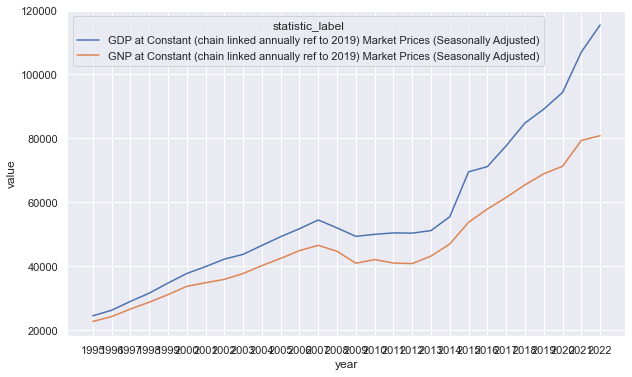

In [46]:
sns.lineplot(data=gdp_gnp_df, x='year', y='value', hue='statistic_label');

In [47]:
# Selecting only the GNP at Constant for later ML activities because it is a useful accurate indicator
gnp_only_df = gdp_gnp_df.loc[gdp_gnp_df['statistic_label'].str.contains('GNP')].copy()
gnp_only_df = gnp_only_df[['year', 'value']].rename(columns={'value': 'gnp'})
gnp_only_df.iloc[[0,-1]]

,year,gnp
28,1995,22634.5
55,2022,80810.0


### Combining the datasets together

In [48]:
full_national_stats = annual_market_info_prices.merge(national_house_registration_df).merge(loan_approvals_df).merge(planning_decisions_df, how='outer').merge(yearly_unemployment_rates).merge(gnp_only_df)
full_national_stats.iloc[[0,-1]]

,year,new_house_price_index,mortgage_interest_rates_index,avg_earnings_of_adult_workers,hcc_index,cpi,avg_price,infation_adjusted_price,house_registrations,new_houses_loans,other_houses_loans,total_loans,new_house_loans_percent,permissions,permission_percent,total_decisions,unemployment_rate,gnp
0,1995,116,64,116.0,114,111,77974.25,118717.551802,19727,20675,28613,49288,41.947330,36801.0,89.1,41282.0,12.125,22634.50
20,2015,420,27,NaN,205,169,281579.50,281579.500000,4297,4685,27551,32236,14.533441,NaN,NaN,NaN,9.900,53701.75


In [49]:
full_national_stats.describe()

,new_house_price_index,mortgage_interest_rates_index,avg_earnings_of_adult_workers,hcc_index,cpi,avg_price,infation_adjusted_price,house_registrations,new_houses_loans,other_houses_loans,total_loans,new_house_loans_percent,permissions,permission_percent,total_decisions,unemployment_rate,gnp
count,21.000000,21.000000,12.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,18.000000,18.000000,18.000000,21.000000,21.000000
mean,316.047619,40.190476,150.916667,173.619048,146.047619,211693.869048,239046.497145,26697.714286,26116.476190,36211.380952,62327.857143,37.426870,51521.388889,91.061111,57171.944444,8.470238,38172.119048
std,106.755082,11.732941,25.783921,34.828833,21.622849,71469.007661,59216.793391,22658.363125,17551.295837,16697.388504,33723.668182,12.057661,18038.680685,5.908731,20360.760856,4.003077,8082.960758
min,116.000000,27.000000,116.000000,114.000000,111.000000,77974.250000,118717.551802,627.000000,2960.000000,9874.000000,12834.000000,13.985641,19985.000000,81.100000,20209.000000,3.908333,22634.500000
25%,253.000000,30.000000,128.000000,140.000000,126.000000,169383.500000,221534.857143,3743.000000,6991.000000,27436.000000,31897.000000,34.918336,38124.750000,86.575000,42466.250000,4.500000,33646.000000
50%,341.000000,36.000000,149.500000,186.000000,150.000000,228216.500000,239716.790373,27080.000000,29220.000000,34408.000000,64652.000000,42.302654,54221.500000,89.750000,61216.000000,7.375000,40760.250000
75%,372.000000,45.000000,172.000000,203.000000,165.000000,249002.000000,281579.500000,38351.000000,39399.000000,48250.000000,88747.000000,45.631965,62123.250000,97.125000,73612.000000,11.958333,43106.250000
max,480.000000,64.000000,189.000000,208.000000,170.000000,321615.750000,331818.229167,66649.000000,58104.000000,61933.000000,120037.000000,48.405075,84612.000000,98.900000,87626.000000,14.666667,53701.750000


In [50]:
full_national_stats.columns

Index(['year', 'new_house_price_index', 'mortgage_interest_rates_index',
       'avg_earnings_of_adult_workers', 'hcc_index', 'cpi', 'avg_price',
       'infation_adjusted_price', 'house_registrations', 'new_houses_loans',
       'other_houses_loans', 'total_loans', 'new_house_loans_percent',
       'permissions', 'permission_percent', 'total_decisions',
       'unemployment_rate', 'gnp'],
      dtype='object')

In [51]:
full_national_stats.isnull().sum()

year                             0
new_house_price_index            0
mortgage_interest_rates_index    0
avg_earnings_of_adult_workers    9
hcc_index                        0
cpi                              0
avg_price                        0
infation_adjusted_price          0
house_registrations              0
new_houses_loans                 0
other_houses_loans               0
total_loans                      0
new_house_loans_percent          0
permissions                      3
permission_percent               3
total_decisions                  3
unemployment_rate                0
gnp                              0
dtype: int64

### Machine Learning Analysis
#### Defining functions to help with iterative experiments
[Go to top](#Table-of-Sections)

In [52]:
# Function to perform linear regression
# It also performms Ridge if specified and can take 'alpha' as user-input
# Returns the LR Model, X and y
def perform_linear_regression(df, features, target, display_coefs=False,
                              ridge=False, ridge_alpha=1, lasso=False, lasso_alpha=1,
                              minmax_scaler=False, standard_scaler=False,
                              prediction_results=False, cross_validate=False):
    X = df[features]
    y = df[target]
    # Call the train_test_split method to split the data and the default splitting is 75% for training and 25% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    
    n_scaler=None
    # Check if Scaler flag is set to True
    if minmax_scaler==True:
        print('Using MinMaxScaler:')
        n_scaler = MinMaxScaler()
        X_train = n_scaler.fit_transform(X_train)
        X_test = n_scaler.transform(X_test)
    if standard_scaler==True:
        print('Using StandardScaler:')
        n_scaler = StandardScaler()
        X_train = n_scaler.fit_transform(X_train)
        X_test = n_scaler.transform(X_test)
        
    # Train the LinearRegression mode by using a method fit() function/method
    lr = LinearRegression().fit(X_train, y_train)
    models = [lr]
    
    if ridge==True:
        # Train the Ridge() mode by calling a fit() method
        rd = Ridge(alpha=ridge_alpha).fit(X_train, y_train)
        models.append(rd)
        
    if lasso==True:
        # Train the Lasso() model on the training data set
        las = Lasso(alpha=lasso_alpha, max_iter=10000).fit(X_train, y_train)
        models.append(las)
        
    # Perform cross-validation with GridSearchCV and append the best estimator Model
    if cross_validate==True:
        models.append(cross_validate_with_gscv(LinearRegression(), X_train, X_test, y_train, y_test))
        if ridge==True:
            models.append(cross_validate_with_gscv(Ridge(), X_train, X_test, y_train, y_test))
        if lasso==True:
            models.append(cross_validate_with_gscv(Lasso(), X_train, X_test, y_train, y_test))
            
    if display_coefs==True:
        display_feature_coefficients(models, features)
        
    # Display Prediction results for all estimators or Models
    if prediction_results==True:
        r2_errors = display_prediction_results(models, X_test, y_test, scaler=n_scaler)
        
    # Create a data structure containing scores for all estimators and scalers
    scores = []
    for model in models:
        model_result = {
            'Target': target,
            'Scaler': n_scaler,
            'Model': str(model),
            'Training Score': model.score(X_train, y_train),
            'Test Score': model.score(X_test, y_test)
        }
        # Only add error measures if prediction_results is True
        if prediction_results==True:
            model_result['R-Squared'] = r2_errors[str(model)][0]
            model_result['Mean Absolute Error'] = r2_errors[str(model)][1]
            model_result['Mean Squared Error'] = r2_errors[str(model)][2]
        
        # Append the model_result dict to scores list
        scores.append(model_result) 
    scores_df = pd.DataFrame.from_dict(scores, orient='columns')
    display(scores_df.head(10))
    return scores_df
    
# Function to run prediction and plot the residuals
def display_prediction_results(models, X_test, y_test, scaler=None):
    print('Prediction Results')
    # Define dict to store the r2, mae and mse
    r2_errors = {}
    # Plot two graphs: first with residuals and second with predicted values
    # If more than 1 model are present, plot 3 graphs. Third one showing the coefficient magnitudes
#     plots = 3 if len(models) > 1 else 2
    plots=2
    fig, axes = plt.subplots(1,plots, figsize=(30, 6), sharex=True)
    for model in models:
        # Predict the target values using the trained model
        y_pred = model.predict(X_test)
        residuals = y_test - y_pred
        axes[0].scatter(y_pred, residuals, label=str(model))
        r2 = round(r2_score(y_test, y_pred), 2)
        mse = round(mean_squared_error(y_test, y_pred), 2)
        mae = round(mean_absolute_error(y_test, y_pred), 2)
        # Add the r2, mae and mse to the dict with Model as key
        r2_errors[str(model)] = [r2, mae, mse]
        axes[1].scatter(y_test, y_pred, label=f'{model.__class__.__name__}: R^2={r2}, MSE={mse}')
        # Only add this plot if plots=3
#         if plots == 3: axes[2].plot(model.coef_, 's', label=str(model))
        
    axes[0].axhline(y=0, color='r', linestyle='-')
    axes[0].set_xlabel('Predicted Values')
    axes[0].set_ylabel('Residuals')
    axes[1].plot(y_test, y_test, color='black', linestyle='--', label='Perfect prediction')
    axes[1].set_xlabel('Actual Values')
    axes[1].set_ylabel('Predicted Values')
    axes[0].legend()
    axes[1].legend()
#     if plots == 3:
#         axes[2].set_xlabel('Coefficient Index')
#         axes[2].set_ylabel('Coefficient Magnitude')
#         axes[2].legend()
    plt.show()
    return r2_errors
    
# Function to display feature coefficients and intercept
def display_feature_coefficients(models, features):
    # Display the coefficient and intercept values
    print('Coefficeints:')
    for model in models:
        print(f'Model: {str(model)}:')
        for i, feature in enumerate(features):
            print(feature, ": ", model.coef_[i])
        # print("lr.coef_: {}".format(lr.coef_))
        print("\nModel intercept_: {}\n".format(model.intercept_))
    
# Function to cross validate the Ridge with GridSearchCV
def cross_validate_with_gscv(model, X_train, X_test, y_train, y_test):
    # Define hyperparameter grid
    if model.__class__.__name__ in ['Ridge', 'Lasso']:
        param_grid = {'alpha': np.logspace(-3, 3, 7)}
        if model.__class__.__name__ == 'Lasso':
            param_grid['max_iter'] = [10000]
    else:
        param_grid = {
            'fit_intercept': [True, False],
            'normalize': [True, False]
        }
        
    # Define GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True, scoring='neg_mean_squared_error')  # removed scoring='neg_mean_squared_error' and return_train_score=True 

    # Fit GridSearchCV object to data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and score
    print(f'\nGridSearchCV: {model.__class__.__name__}')
    print("Best estimator: ", grid_search.best_estimator_)
    print("Best score: ", np.sqrt(-grid_search.best_score_))
    
    # Show the performance of alpha if the  model is ridge or lasso
    if model.__class__.__name__ in ['Ridge', 'Lasso']:
        # Extract the actual and predicted values for the hyperparameter 'alpha'
        actual_values = grid_search.cv_results_['param_alpha'].data
        predicted_values = grid_search.cv_results_['mean_test_score']

        # Plot the actual vs predicted values
        plt.semilogx(actual_values, predicted_values)
        plt.xlabel('alpha')
        plt.ylabel('Cross-validation score')
        plt.title(f'Actual vs predicted values for alpha in {model.__class__.__name__} regression')
        plt.show()
    
    return grid_search.best_estimator_

#### Feature Selection

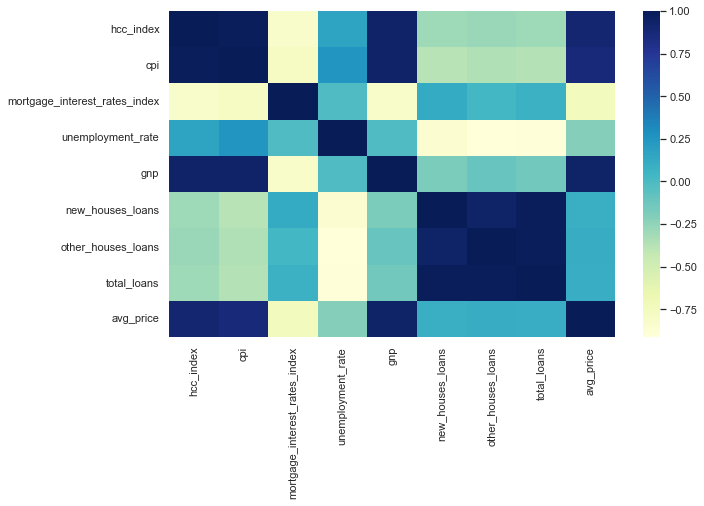

The 5 selected features based on Pearson correlation coefficients are: hcc_index, cpi, mortgage_interest_rates_index, unemployment_rate, gnp

The most important feature is "gnp" with 0.9366


In [53]:
# Defining features sets
# Not using features with some null values: permissions, permission_percent, avg_earnings_of_adult_workers and total_decisions
# Also not using new_house_price_index because it is another form of average price itself, and would defeat purpose of prediction
target, features = 'avg_price', ['hcc_index', 'cpi', 'mortgage_interest_rates_index', 'unemployment_rate', 'gnp', 'new_houses_loans', 'other_houses_loans', 'total_loans']

# Compute Pearson correlation coefficients
features_target = features + [target]
corr = full_national_stats[features_target].corr(method='pearson')

# Select k best features based on correlation coefficients
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(full_national_stats[features], full_national_stats[target])
features = full_national_stats[features].columns[selector.get_support()]

# Plot correlation matrix as heatmap
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

print(f'The {k} selected features based on Pearson correlation coefficients are: {", ".join(features)}')

# Order the feature with the highest correlation with the target
corr_with_target = corr[target].abs().sort_values(ascending=False)
# print('\nFeatures correlated with target:\n', corr_with_target)
# Get the most important feature
print(f'\nThe most important feature is "{corr_with_target.index[1]}" with {round(corr_with_target[1], 4)}')

In [54]:
# Describe the full dataset
print('Shape: ', full_national_stats.shape)
print('Skewness: ', full_national_stats[target].skew())
full_national_stats[features_target].describe().transpose()

Shape:  (21, 18)
Skewness:  -0.4488996643330822


,count,mean,std,min,25%,50%,75%,max
hcc_index,21.0,173.619048,34.828833,114.000000,140.0,186.000,203.000000,208.000000
cpi,21.0,146.047619,21.622849,111.000000,126.0,150.000,165.000000,170.000000
mortgage_interest_rates_index,21.0,40.190476,11.732941,27.000000,30.0,36.000,45.000000,64.000000
unemployment_rate,21.0,8.470238,4.003077,3.908333,4.5,7.375,11.958333,14.666667
gnp,21.0,38172.119048,8082.960758,22634.500000,33646.0,40760.250,43106.250000,53701.750000
new_houses_loans,21.0,26116.476190,17551.295837,2960.000000,6991.0,29220.000,39399.000000,58104.000000
other_houses_loans,21.0,36211.380952,16697.388504,9874.000000,27436.0,34408.000,48250.000000,61933.000000
total_loans,21.0,62327.857143,33723.668182,12834.000000,31897.0,64652.000,88747.000000,120037.000000
avg_price,21.0,211693.869048,71469.007661,77974.250000,169383.5,228216.500,249002.000000,321615.750000


#### Regression Models

Coefficeints:
Model: LinearRegression():
hcc_index :  283.50130154249683
cpi :  2263.539826690218
mortgage_interest_rates_index :  315.81102167871484
unemployment_rate :  -8072.3573422923955
gnp :  2.2171269681230115

Model intercept_: -198617.4886957663

Prediction Results


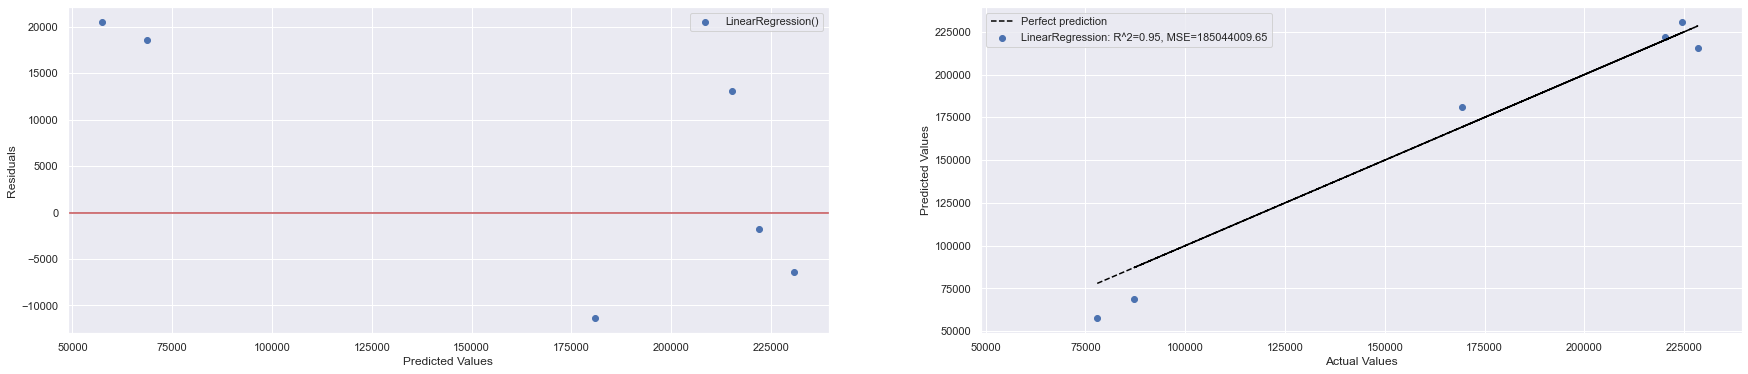

,Target,Scaler,Model,Training Score,Test Score,R-Squared,Mean Absolute Error,Mean Squared Error
0,avg_price,None,LinearRegression(),0.950895,0.954067,0.95,11942.43,1.850440e+08


In [55]:
# Perform Linear Regression
# target, features = 'avg_price', ['hcc_index', 'cpi', 'mortgage_interest_rates_index', 'unemployment_rate', 'gnp']
# Use selected features from above
scores = perform_linear_regression(full_national_stats, features, target, display_coefs=True, prediction_results=True)

Coefficeints:
Model: LinearRegression():
hcc_index :  283.50130154249683
cpi :  2263.539826690218
mortgage_interest_rates_index :  315.81102167871484
unemployment_rate :  -8072.3573422923955
gnp :  2.2171269681230115

Model intercept_: -198617.4886957663

Model: Ridge(alpha=1):
hcc_index :  371.73045353157175
cpi :  2083.4828261620855
mortgage_interest_rates_index :  352.563543884394
unemployment_rate :  -7890.477457577715
gnp :  2.353134125739427

Model intercept_: -195793.09995994548

Model: Lasso(alpha=1, max_iter=10000):
hcc_index :  283.7408479965949
cpi :  2263.0483615517596
mortgage_interest_rates_index :  315.890974008202
unemployment_rate :  -8071.898463787299
gnp :  2.217483884978038

Model intercept_: -198607.8947310528

Prediction Results


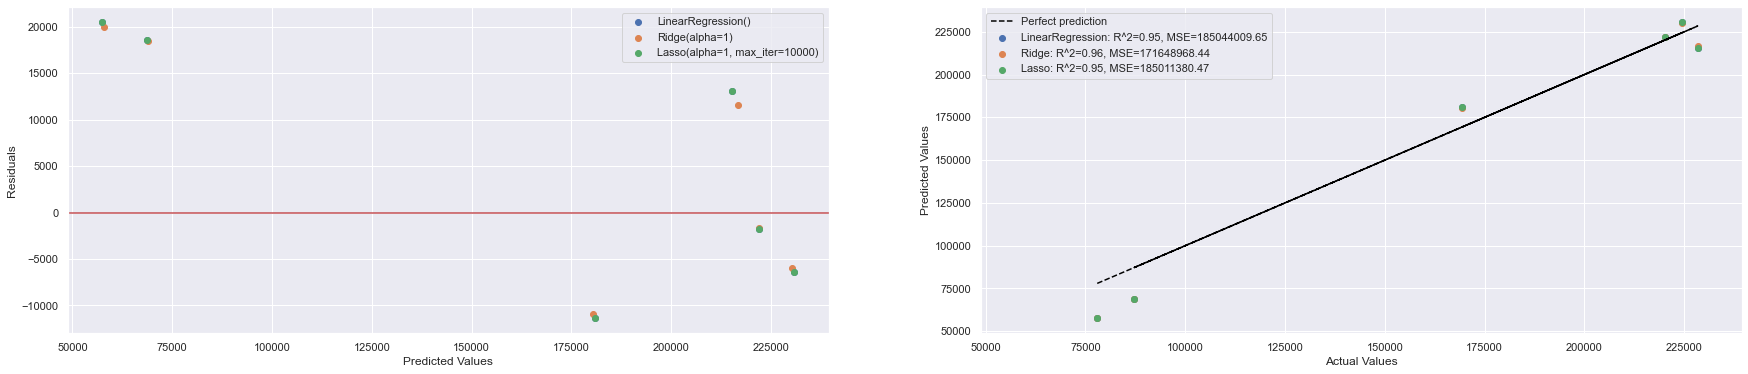

,Target,Scaler,Model,Training Score,Test Score,R-Squared,Mean Absolute Error,Mean Squared Error
0,avg_price,None,LinearRegression(),0.950895,0.954067,0.95,11942.43,1.850440e+08
1,avg_price,None,Ridge(alpha=1),0.950866,0.957392,0.96,11416.59,1.716490e+08
2,avg_price,None,"Lasso(alpha=1, max_iter=10000)",0.950895,0.954075,0.95,11941.15,1.850114e+08


In [56]:
# Perform Linear Regression along with Ridge and Lasso, and compare their results
target, features = 'avg_price', ['hcc_index', 'cpi', 'mortgage_interest_rates_index', 'unemployment_rate', 'gnp']
scores1 = perform_linear_regression(full_national_stats, features, target, display_coefs=True, prediction_results=True, ridge=True, lasso=True)

#### Regressions with Scaling and Cross Validation

Using MinMaxScaler:

GridSearchCV: LinearRegression
Best estimator:  LinearRegression(normalize=True)
Best score:  26570.187526976482

GridSearchCV: Ridge
Best estimator:  Ridge(alpha=0.1)
Best score:  18812.102309237343


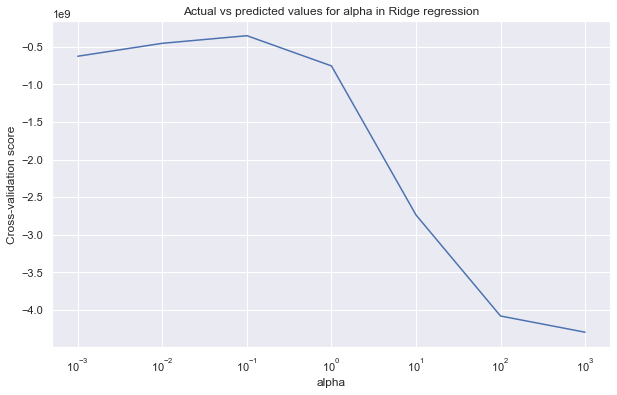


GridSearchCV: Lasso
Best estimator:  Lasso(alpha=1000.0, max_iter=10000)
Best score:  20277.420822944307


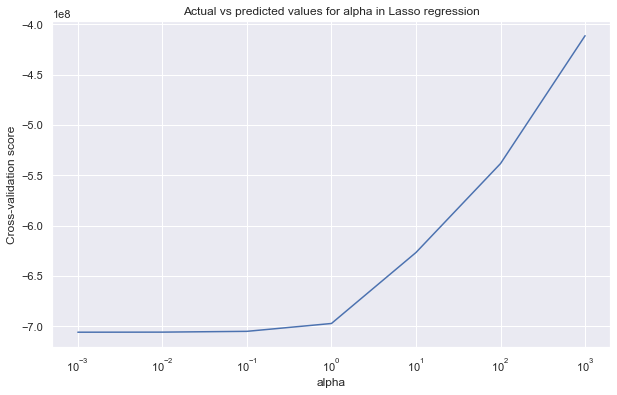

Prediction Results


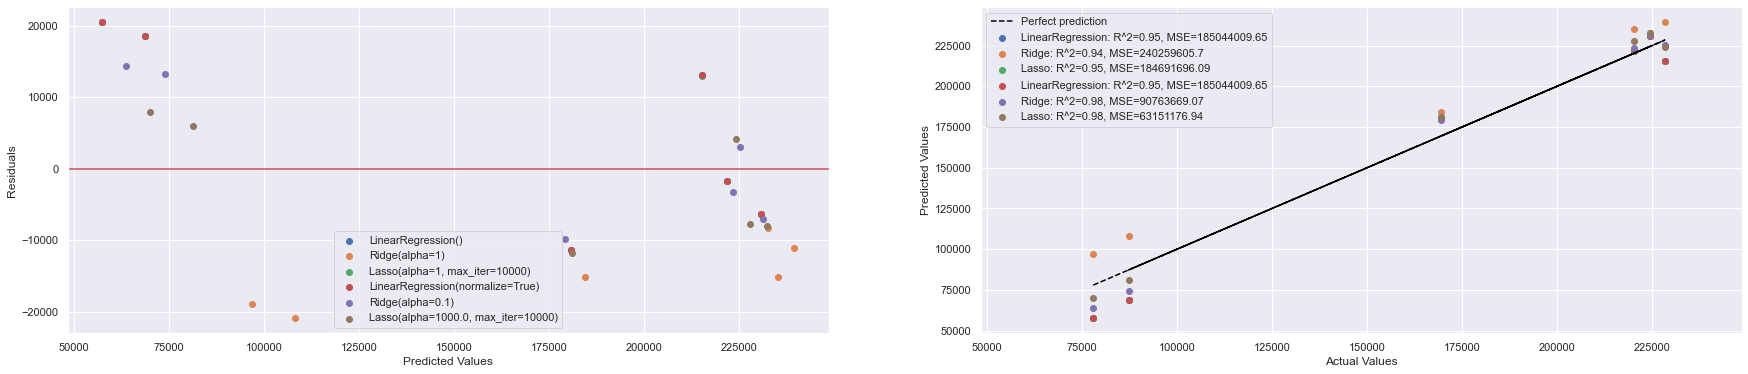

,Target,Scaler,Model,Training Score,Test Score,R-Squared,Mean Absolute Error,Mean Squared Error
0,avg_price,MinMaxScaler(),LinearRegression(),0.950895,0.954067,0.95,11942.43,1.850440e+08
1,avg_price,MinMaxScaler(),Ridge(alpha=1),0.878361,0.940361,0.94,14898.70,2.402596e+08
2,avg_price,MinMaxScaler(),"Lasso(alpha=1, max_iter=10000)",0.950895,0.954155,0.95,11931.15,1.846917e+08
3,avg_price,MinMaxScaler(),LinearRegression(normalize=True),0.950895,0.954067,0.95,11942.43,1.850440e+08
4,avg_price,MinMaxScaler(),Ridge(alpha=0.1),0.948004,0.977470,0.98,8436.71,9.076367e+07
5,avg_price,MinMaxScaler(),"Lasso(alpha=1000.0, max_iter=10000)",0.942553,0.984324,0.98,7596.22,6.315118e+07


In [57]:
# Scale the data using MinMaxScaler and perform Linear Regression, Ridge Regression and Lasso
# Also Cross-validate the models with multiple hyper-parameters
target, features = 'avg_price', ['hcc_index', 'cpi', 'mortgage_interest_rates_index', 'unemployment_rate', 'gnp']
scores2 = perform_linear_regression(full_national_stats, features, target, prediction_results=True, ridge=True, lasso=True, minmax_scaler=True, cross_validate=True)

Using StandardScaler:

GridSearchCV: LinearRegression
Best estimator:  LinearRegression()
Best score:  26570.187526976428

GridSearchCV: Ridge
Best estimator:  Ridge()
Best score:  19265.02681804551


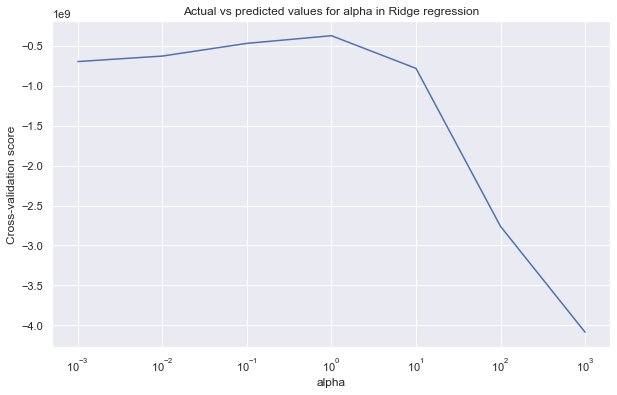


GridSearchCV: Lasso
Best estimator:  Lasso(alpha=1000.0, max_iter=10000)
Best score:  23065.71500049458


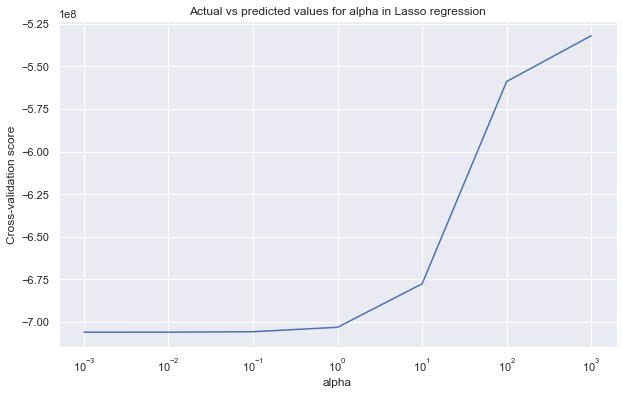

Prediction Results


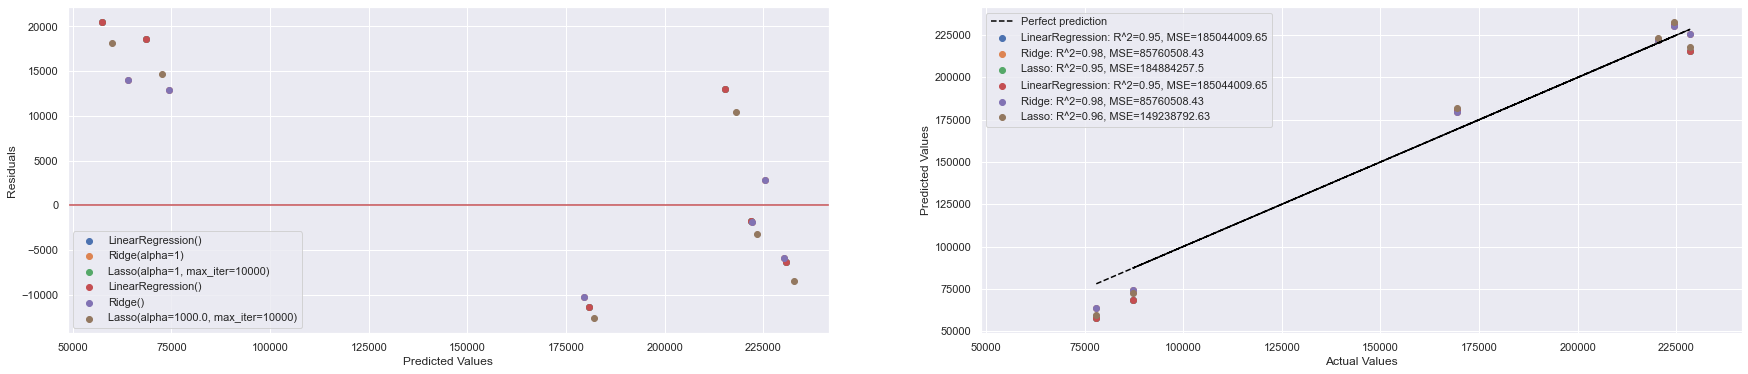

,Target,Scaler,Model,Training Score,Test Score,R-Squared,Mean Absolute Error,Mean Squared Error
0,avg_price,StandardScaler(),LinearRegression(),0.950895,0.954067,0.95,11942.43,1.850440e+08
1,avg_price,StandardScaler(),Ridge(alpha=1),0.947555,0.978712,0.98,7973.87,8.576051e+07
2,avg_price,StandardScaler(),"Lasso(alpha=1, max_iter=10000)",0.950895,0.954107,0.95,11936.59,1.848843e+08
3,avg_price,StandardScaler(),LinearRegression(),0.950895,0.954067,0.95,11942.43,1.850440e+08
4,avg_price,StandardScaler(),Ridge(),0.947555,0.978712,0.98,7973.87,8.576051e+07
5,avg_price,StandardScaler(),"Lasso(alpha=1000.0, max_iter=10000)",0.948998,0.962955,0.96,11249.68,1.492388e+08


In [58]:
# Scale the data using StandardScaler and perform Linear Regression and Ridge Regression
# Also cross-validate
target, features = 'avg_price', ['hcc_index', 'cpi', 'mortgage_interest_rates_index', 'unemployment_rate', 'gnp']
scores3 = perform_linear_regression(full_national_stats, features, target, prediction_results=True, ridge=True, lasso=True, standard_scaler=True, cross_validate=True)

In above test using StandardScaler(), the best hyperparameters aren't present in the best estimator from GridSearchCV. Thus, it is resulting in LinearRegression() and Ridge() with default parameters.

Using StandardScaler:

GridSearchCV: LinearRegression
Best estimator:  LinearRegression(normalize=True)
Best score:  27558.531809514385

GridSearchCV: Ridge
Best estimator:  Ridge()
Best score:  19113.54654140983


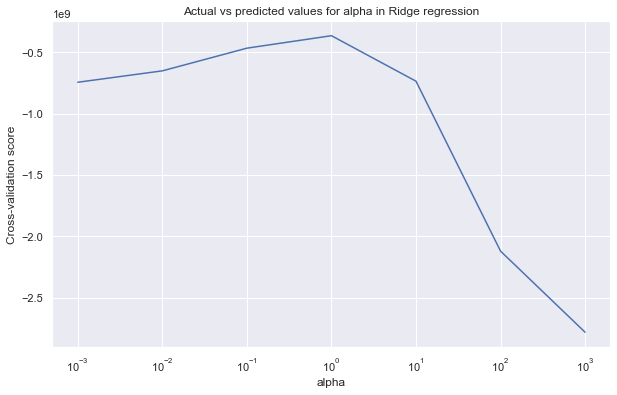


GridSearchCV: Lasso
Best estimator:  Lasso(alpha=1000.0, max_iter=10000)
Best score:  21406.891067712237


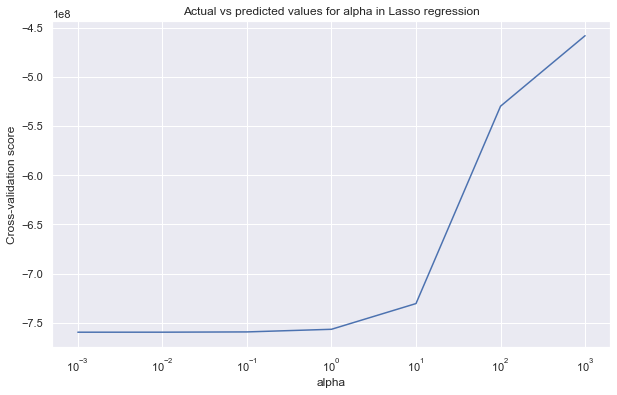

Prediction Results


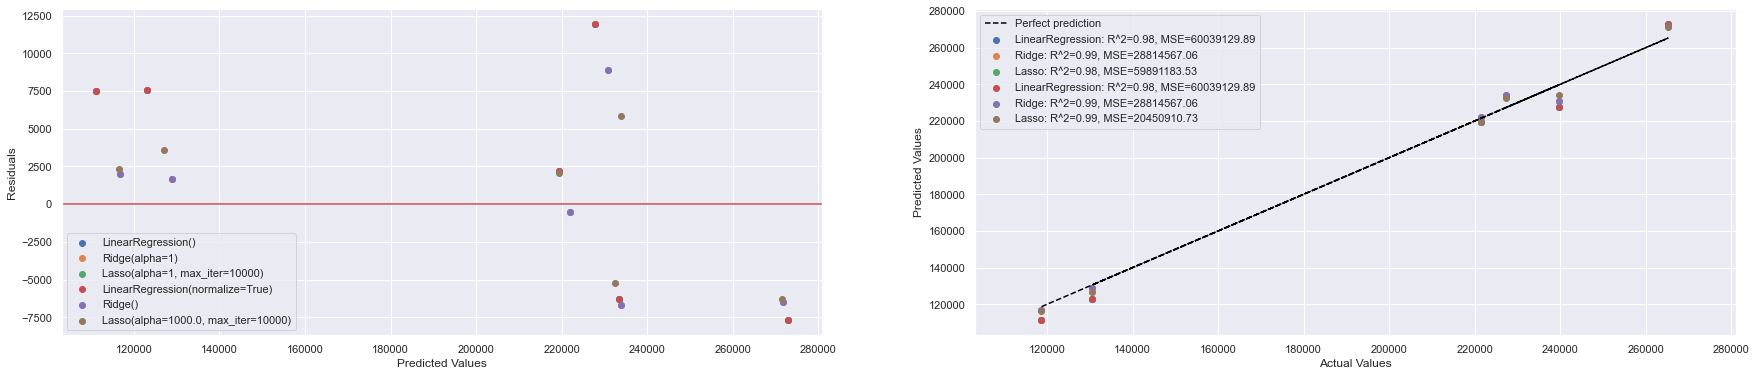

,Target,Scaler,Model,Training Score,Test Score,R-Squared,Mean Absolute Error,Mean Squared Error
0,infation_adjusted_price,StandardScaler(),LinearRegression(),0.919240,0.980483,0.98,7206.26,60039129.89
1,infation_adjusted_price,StandardScaler(),Ridge(alpha=1),0.916036,0.990633,0.99,4367.30,28814567.06
2,infation_adjusted_price,StandardScaler(),"Lasso(alpha=1, max_iter=10000)",0.919240,0.980531,0.98,7198.87,59891183.53
3,infation_adjusted_price,StandardScaler(),LinearRegression(normalize=True),0.919240,0.980483,0.98,7206.26,60039129.89
4,infation_adjusted_price,StandardScaler(),Ridge(),0.916036,0.990633,0.99,4367.30,28814567.06
5,infation_adjusted_price,StandardScaler(),"Lasso(alpha=1000.0, max_iter=10000)",0.917561,0.993352,0.99,4208.12,20450910.73


In [59]:
# Scale the data using StandardScaler and perform Linear Regression and Ridge Regression
# Also cross-validate
# Changing target feature from 'avg_price' to 'infation_adjusted_price'
target, features = 'infation_adjusted_price', ['hcc_index', 'cpi', 'mortgage_interest_rates_index', 'unemployment_rate', 'gnp']
scores4 = perform_linear_regression(full_national_stats, features, target, prediction_results=True, ridge=True, lasso=True, standard_scaler=True, cross_validate=True)

Using MinMaxScaler:

GridSearchCV: LinearRegression
Best estimator:  LinearRegression(normalize=True)
Best score:  27558.5318095144

GridSearchCV: Ridge
Best estimator:  Ridge(alpha=0.1)
Best score:  18770.73236444356


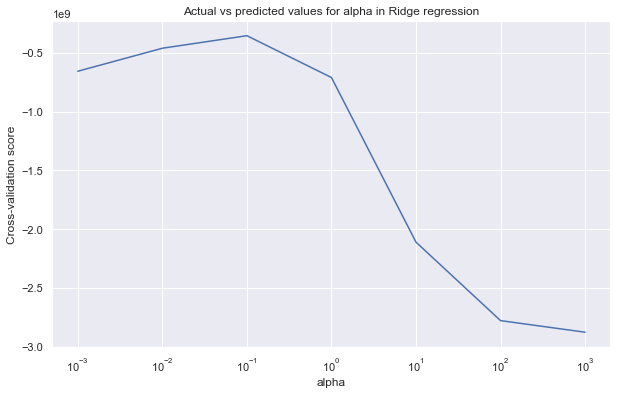


GridSearchCV: Lasso
Best estimator:  Lasso(alpha=1000.0, max_iter=10000)
Best score:  19583.687987541012


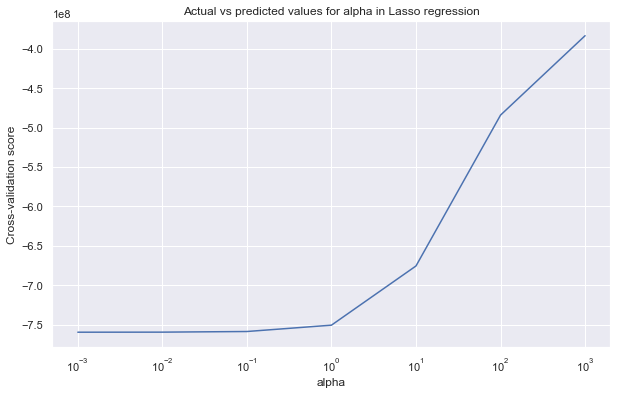

Prediction Results


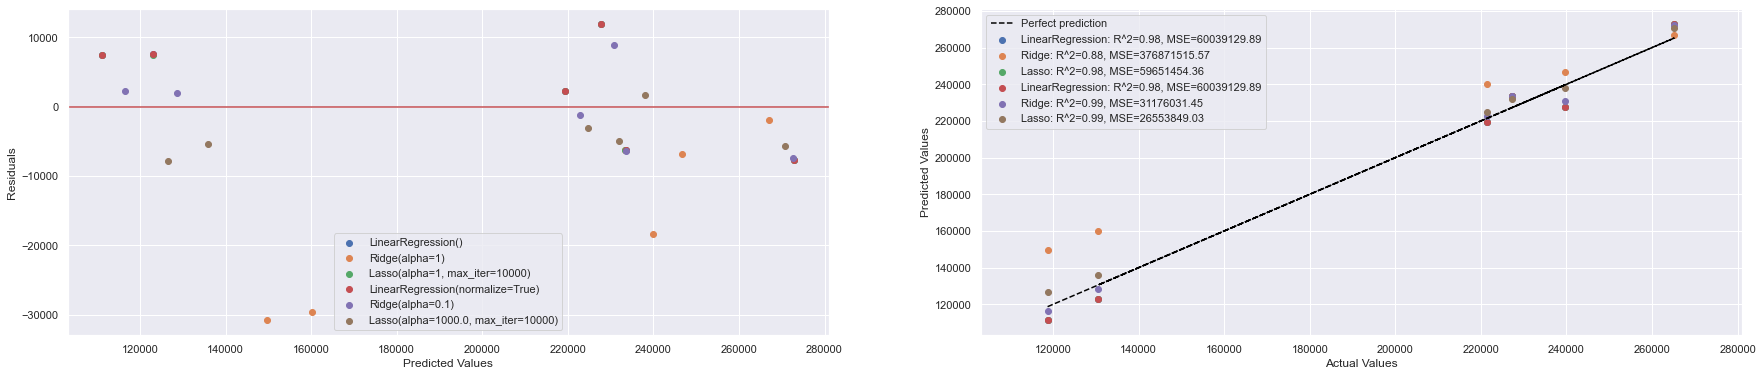

,Target,Scaler,Model,Training Score,Test Score,R-Squared,Mean Absolute Error,Mean Squared Error
0,infation_adjusted_price,MinMaxScaler(),LinearRegression(),0.919240,0.980483,0.98,7206.26,6.003913e+07
1,infation_adjusted_price,MinMaxScaler(),Ridge(alpha=1),0.824033,0.877491,0.88,15651.99,3.768715e+08
2,infation_adjusted_price,MinMaxScaler(),"Lasso(alpha=1, max_iter=10000)",0.919240,0.980609,0.98,7186.21,5.965145e+07
3,infation_adjusted_price,MinMaxScaler(),LinearRegression(normalize=True),0.919240,0.980483,0.98,7206.26,6.003913e+07
4,infation_adjusted_price,MinMaxScaler(),Ridge(alpha=0.1),0.916684,0.989866,0.99,4716.29,3.117603e+07
5,infation_adjusted_price,MinMaxScaler(),"Lasso(alpha=1000.0, max_iter=10000)",0.908263,0.991368,0.99,4760.81,2.655385e+07


In [60]:
# Scale the data using StandardScaler and perform Linear Regression and Ridge Regression
# Also cross-validate
# Changing target feature from 'avg_price' to 'infation_adjusted_price'
target, features = 'infation_adjusted_price', ['hcc_index', 'cpi', 'mortgage_interest_rates_index', 'unemployment_rate', 'gnp']
scores5 = perform_linear_regression(full_national_stats, features, target, prediction_results=True, ridge=True, lasso=True, minmax_scaler=True, cross_validate=True)

In [61]:
all_scores = pd.concat([scores1, scores2, scores3, scores4, scores5])
all_scores = all_scores.reset_index().drop(columns=['index'])
all_scores

,Target,Scaler,Model,Training Score,Test Score,R-Squared,Mean Absolute Error,Mean Squared Error
0,avg_price,None,LinearRegression(),0.950895,0.954067,0.95,11942.43,1.850440e+08
1,avg_price,None,Ridge(alpha=1),0.950866,0.957392,0.96,11416.59,1.716490e+08
2,avg_price,None,"Lasso(alpha=1, max_iter=10000)",0.950895,0.954075,0.95,11941.15,1.850114e+08
3,avg_price,MinMaxScaler(),LinearRegression(),0.950895,0.954067,0.95,11942.43,1.850440e+08
4,avg_price,MinMaxScaler(),Ridge(alpha=1),0.878361,0.940361,0.94,14898.70,2.402596e+08
5,avg_price,MinMaxScaler(),"Lasso(alpha=1, max_iter=10000)",0.950895,0.954155,0.95,11931.15,1.846917e+08
6,avg_price,MinMaxScaler(),LinearRegression(normalize=True),0.950895,0.954067,0.95,11942.43,1.850440e+08
7,avg_price,MinMaxScaler(),Ridge(alpha=0.1),0.948004,0.977470,0.98,8436.71,9.076367e+07
8,avg_price,MinMaxScaler(),"Lasso(alpha=1000.0, max_iter=10000)",0.942553,0.984324,0.98,7596.22,6.315118e+07
9,avg_price,StandardScaler(),LinearRegression(),0.950895,0.954067,0.95,11942.43,1.850440e+08


#### Deciding on the best performing Model and parameters
[Go to top](#Table-of-Sections)

In [62]:
# Get the best combinations of target variable, Scaler and Model parameters for combined highest training and test scores
all_scores.sort_values(by=['Training Score', 'Test Score'], ascending=False).head(1)

,Target,Scaler,Model,Training Score,Test Score,R-Squared,Mean Absolute Error,Mean Squared Error
6,avg_price,MinMaxScaler(),LinearRegression(normalize=True),0.950895,0.954067,0.95,11942.43,1.850440e+08


In [63]:
# Get the best combinations of target variable, Scaler and Model parameters for highest training score
all_scores.sort_values(by=['Training Score'], ascending=False).head(1)

,Target,Scaler,Model,Training Score,Test Score,R-Squared,Mean Absolute Error,Mean Squared Error
6,avg_price,MinMaxScaler(),LinearRegression(normalize=True),0.950895,0.954067,0.95,11942.43,1.850440e+08


In [64]:
# Get the best combinations of target variable, Scaler and Model parameters for highest test score
all_scores.sort_values(by=['Test Score'], ascending=False).head(1)

,Target,Scaler,Model,Training Score,Test Score,R-Squared,Mean Absolute Error,Mean Squared Error
20,infation_adjusted_price,StandardScaler(),"Lasso(alpha=1000.0, max_iter=10000)",0.917561,0.993352,0.99,4208.12,20450910.73
